In [40]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
cash1 = pd.read_csv("/Users/anastasiatkaceva/Desktop/IronHack2024/LABs/lab_9/project_dataset/cash_request.csv")

In [42]:
cash.head()

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


In [43]:
cash = cash1.copy()

In [44]:
cash['created_at'] = pd.to_datetime(cash['created_at'])
cash['updated_at'] = pd.to_datetime(cash['updated_at'])
cash['moderated_at'] = pd.to_datetime(cash['moderated_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reimbursement_date']=pd.to_datetime(cash['reimbursement_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['reco_last_update']=pd.to_datetime(cash['reco_last_update'])
cash['reco_creation'] = pd.to_datetime(cash['reco_creation'])
cash['cash_request_received_date'] = pd.to_datetime(cash['cash_request_received_date'])
cash['money_back_date'] = pd.to_datetime(cash['money_back_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
cash['send_at'] = pd.to_datetime(cash['send_at'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')


In [45]:
cash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          23970 non-null  int64              
 1   amount                      23970 non-null  float64            
 2   status                      23970 non-null  object             
 3   created_at                  23970 non-null  datetime64[ns, UTC]
 4   updated_at                  23970 non-null  datetime64[ns, UTC]
 5   user_id                     21867 non-null  float64            
 6   moderated_at                123 non-null    datetime64[ns, UTC]
 7   deleted_account_id          2104 non-null   float64            
 8   reimbursement_date          20920 non-null  datetime64[ns, UTC]
 9   cash_request_received_date  16289 non-null  datetime64[ns]     
 10  money_back_date             4503 non-null   datetime64[ns,

In [46]:
cash.duplicated().sum()

0

In [47]:
numero_nulos = cash['user_id'].isna().sum()
numero_nulos

2103

In [48]:


incidents = cash.dropna(subset=['reco_last_update'])
incidents.sample(10)

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
16603,16744,50.0,money_back,2020-09-18 12:01:50.796057+00:00,2020-12-18 13:10:58.175629+00:00,37034.0,NaT,NaN,2020-10-06 10:00:00+00:00,2020-09-22,NaT,instant,NaT,completed,2020-10-15 22:26:56.847310+00:00,2020-12-10 11:00:02.346448+00:00
23630,24741,25.0,money_back,2020-10-26 16:49:43.025777+00:00,2020-12-18 13:15:46.701347+00:00,46601.0,NaT,NaN,2020-11-30 11:00:00+00:00,2020-10-28,NaT,instant,NaT,completed,2020-12-09 22:09:01.148515+00:00,2020-12-09 22:09:04.067530+00:00
12890,24264,25.0,money_back,2020-10-25 08:45:57.996411+00:00,2020-12-18 13:09:36.211318+00:00,41346.0,NaT,NaN,2020-11-29 11:00:00+00:00,2020-10-27,2020-12-10 23:00:00+00:00,instant,NaT,completed,2020-12-07 22:44:55.135964+00:00,2020-12-07 22:44:55.135975+00:00
14297,11875,100.0,money_back,2020-08-11 06:46:28.968339+00:00,2020-12-18 13:10:06.023610+00:00,13539.0,NaT,NaN,2020-09-19 22:00:00+00:00,2020-08-12,NaT,regular,NaT,completed,2020-09-05 22:41:12.672385+00:00,2020-12-01 05:55:05.946464+00:00
23365,23660,100.0,money_back,2020-10-23 16:40:53.751476+00:00,2020-12-18 13:14:51.701865+00:00,83527.0,NaT,NaN,2020-11-10 11:00:00+00:00,2020-10-27,NaT,instant,NaT,completed,2020-11-21 22:26:45.918700+00:00,2020-11-21 22:26:54.199844+00:00
21594,17439,100.0,money_back,2020-09-23 10:42:26.340815+00:00,2020-12-18 13:13:00.257158+00:00,44597.0,NaT,NaN,2020-10-13 10:00:00+00:00,2020-09-24,NaT,instant,NaT,completed,2020-10-24 22:19:35.529766+00:00,2020-11-05 18:12:58.717435+00:00
6484,7060,100.0,direct_debit_rejected,2020-07-08 06:12:15.316923+00:00,2020-12-26 22:11:03.622272+00:00,25193.0,NaT,NaN,2020-08-14 22:00:00+00:00,2020-07-10,NaT,regular,NaT,pending,2020-08-22 22:21:10.625786+00:00,2020-12-26 22:11:03.638069+00:00
23185,20822,100.0,money_back,2020-10-13 10:24:37.689028+00:00,2020-12-18 13:14:29.149373+00:00,33727.0,NaT,NaN,2020-11-05 22:00:00+00:00,2020-10-15,NaT,instant,NaT,completed,2020-11-14 22:57:16.697258+00:00,2020-11-14 22:57:19.762701+00:00
16924,23532,25.0,money_back,2020-10-23 15:19:51.630218+00:00,2020-12-18 13:11:05.385166+00:00,41622.0,NaT,NaN,2020-11-05 22:00:00+00:00,2020-10-27,NaT,instant,NaT,completed,2020-12-02 22:21:48.432861+00:00,2020-12-02 22:21:51.787238+00:00
19646,19362,50.0,money_back,2020-10-06 05:42:44.940455+00:00,2020-12-18 13:12:11.330932+00:00,45238.0,NaT,NaN,2020-10-26 23:00:00+00:00,2020-10-07,NaT,instant,NaT,completed,2020-11-06 22:40:33.656619+00:00,2020-11-25 22:07:14.023441+00:00


In [49]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3330 entries, 5 to 23966
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   id                          3330 non-null   int64              
 1   amount                      3330 non-null   float64            
 2   status                      3330 non-null   object             
 3   created_at                  3330 non-null   datetime64[ns, UTC]
 4   updated_at                  3330 non-null   datetime64[ns, UTC]
 5   user_id                     3140 non-null   float64            
 6   moderated_at                55 non-null     datetime64[ns, UTC]
 7   deleted_account_id          191 non-null    float64            
 8   reimbursement_date          2893 non-null   datetime64[ns, UTC]
 9   cash_request_received_date  3198 non-null   datetime64[ns]     
 10  money_back_date             449 non-null    datetime64[ns, UTC]


In [50]:
for column in incidents.columns:
    print("Value counts for column", column, ":")
    print(incidents[column].value_counts())
    print()

Value counts for column id :
id
2145     1
14709    1
13760    1
13759    1
11725    1
        ..
11775    1
20530    1
23707    1
17885    1
25243    1
Name: count, Length: 3330, dtype: int64

Value counts for column amount :
amount
100.0    2038
50.0      855
25.0      303
70.0       25
80.0       21
20.0       21
60.0       17
40.0       13
30.0       13
90.0        7
10.0        6
45.0        4
200.0       1
99.0        1
15.0        1
11.0        1
35.0        1
65.0        1
95.0        1
Name: count, dtype: int64

Value counts for column status :
status
money_back               2460
direct_debit_rejected     820
active                     33
direct_debit_sent          16
transaction_declined        1
Name: count, dtype: int64

Value counts for column created_at :
created_at
2020-05-23 20:58:55.129432+00:00    1
2020-09-05 13:56:01.951428+00:00    1
2020-08-24 15:31:29.444859+00:00    1
2020-08-24 15:10:42.185727+00:00    1
2020-08-10 13:38:50.028947+00:00    1
                  

In [51]:
incidents['m_created_at'] = incidents['created_at'].dt.month

incidents.sample(5)

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_63563/4209000870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incidents['m_created_at'] = incidents['created_at'].dt.month


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update,m_created_at
14589,8205,100.0,money_back,2020-07-15 14:08:21.640075+00:00,2020-12-18 13:10:14.520781+00:00,6757.0,NaT,NaN,2020-08-08 23:51:00+00:00,2020-07-18,NaT,regular,NaT,completed,2020-08-15 22:28:29.150524+00:00,2020-08-19 14:08:11.141587+00:00,7
9688,11775,100.0,money_back,2020-08-10 16:48:53.383456+00:00,2021-01-05 02:19:50.216234+00:00,17218.0,NaT,NaN,2020-11-04 10:00:00+00:00,2020-08-19,NaT,regular,NaT,completed,2020-11-15 22:44:45.510708+00:00,2021-01-05 02:19:50.181900+00:00,8
23215,21250,100.0,money_back,2020-10-15 08:50:09.154452+00:00,2020-12-18 13:14:32.231275+00:00,69345.0,NaT,NaN,2020-11-05 22:00:00+00:00,2020-10-16,NaT,instant,NaT,completed,2020-11-15 22:14:40.961176+00:00,2020-12-02 13:50:31.380190+00:00,10
23686,17520,50.0,money_back,2020-09-23 16:57:46.216039+00:00,2020-12-18 13:15:58.529501+00:00,NaN,NaT,24576.0,NaT,2020-09-24,NaT,instant,NaT,completed,2020-10-21 22:12:55.714326+00:00,2020-11-03 08:05:59.162709+00:00,9
9086,869,100.0,direct_debit_rejected,2020-03-13 09:30:23.537354+00:00,2020-12-29 22:04:00.433063+00:00,1547.0,2020-03-13 13:45:24+00:00,NaN,2020-03-29 22:00:00+00:00,2020-03-17,2020-08-27 01:01:53+00:00,regular,NaT,completed,2020-05-05 13:51:06.616406+00:00,2020-08-27 01:01:53.266294+00:00,3


In [81]:

from datetime import datetime
#Following tutorial from youtube I will first create a subset only with the relevan data 
incidents1 = incidents[['user_id', 'created_at', 'amount', 'recovery_status']].copy(deep=True)
incidents1.head()

,user_id,created_at,amount,recovery_status
5,9489.0,2020-05-23 20:58:55.129432+00:00,100.0,completed
11,778.0,2020-05-14 21:11:47.393326+00:00,100.0,completed
72,10503.0,2020-05-28 23:21:24.988386+00:00,100.0,completed
84,4411.0,2020-03-16 16:15:53.191521+00:00,100.0,completed
141,23328.0,2020-07-01 09:30:03.145410+00:00,100.0,pending


In [67]:
incidents1['YM'] = incidents1['created_at'].dt.to_period('M')
incidents1

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_63563/1355081597.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incidents1['YM'] = incidents1['created_at'].dt.to_period('M')


,user_id,created_at,amount,recovery_status,YM
5,9489.0,2020-05-23 20:58:55.129432+00:00,100.0,completed,2020-05
11,778.0,2020-05-14 21:11:47.393326+00:00,100.0,completed,2020-05
72,10503.0,2020-05-28 23:21:24.988386+00:00,100.0,completed,2020-05
84,4411.0,2020-03-16 16:15:53.191521+00:00,100.0,completed,2020-03
141,23328.0,2020-07-01 09:30:03.145410+00:00,100.0,pending,2020-07
...,...,...,...,...,...
23944,70153.0,2020-10-13 11:09:10.901242+00:00,100.0,pending,2020-10
23947,100040.0,2020-10-30 17:56:21.177118+00:00,100.0,pending,2020-10
23963,31413.0,2020-07-14 08:55:09.360786+00:00,100.0,completed,2020-07
23964,20064.0,2020-09-19 07:37:14.351567+00:00,100.0,completed,2020-09


In [68]:
start_month = incidents1['YM'].min()
start_month

Period('2019-12', 'M')

In [69]:
incidents1['index_month_cash_request'] = incidents1['YM'].apply(lambda x: (x - start_month).n)
incidents1

,user_id,created_at,amount,recovery_status,YM,index_month_cash_request
5,9489.0,2020-05-23 20:58:55.129432+00:00,100.0,completed,2020-05,5
11,778.0,2020-05-14 21:11:47.393326+00:00,100.0,completed,2020-05,5
72,10503.0,2020-05-28 23:21:24.988386+00:00,100.0,completed,2020-05,5
84,4411.0,2020-03-16 16:15:53.191521+00:00,100.0,completed,2020-03,3
141,23328.0,2020-07-01 09:30:03.145410+00:00,100.0,pending,2020-07,7
...,...,...,...,...,...,...
23944,70153.0,2020-10-13 11:09:10.901242+00:00,100.0,pending,2020-10,10
23947,100040.0,2020-10-30 17:56:21.177118+00:00,100.0,pending,2020-10,10
23963,31413.0,2020-07-14 08:55:09.360786+00:00,100.0,completed,2020-07,7
23964,20064.0,2020-09-19 07:37:14.351567+00:00,100.0,completed,2020-09,9


In [82]:
incidents1['Cohorte'] = incidents1.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
incidents1

/var/folders/4g/sgz9y_613xx0psmwjwfnwntm0000gn/T/ipykernel_63563/3253722031.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  incidents1['Cohorte'] = incidents1.groupby('user_id')['created_at'].transform('min').dt.to_period('M')


,user_id,created_at,amount,recovery_status,Cohorte
5,9489.0,2020-05-23 20:58:55.129432+00:00,100.0,completed,2020-05
11,778.0,2020-05-14 21:11:47.393326+00:00,100.0,completed,2020-05
72,10503.0,2020-05-28 23:21:24.988386+00:00,100.0,completed,2020-05
84,4411.0,2020-03-16 16:15:53.191521+00:00,100.0,completed,2020-03
141,23328.0,2020-07-01 09:30:03.145410+00:00,100.0,pending,2020-07
...,...,...,...,...,...
23944,70153.0,2020-10-13 11:09:10.901242+00:00,100.0,pending,2020-10
23947,100040.0,2020-10-30 17:56:21.177118+00:00,100.0,pending,2020-10
23963,31413.0,2020-07-14 08:55:09.360786+00:00,100.0,completed,2020-07
23964,20064.0,2020-09-19 07:37:14.351567+00:00,100.0,completed,2020-09


In [70]:
# incidents2 = incidents1.groupby('user_id')['index_month_cash_request'].min().reset_index()
# incidents2= incidents2.rename(columns={'index_month_cash_request':'cohort_month'})
# incidents2.sample(10)

,user_id,cohort_month
800,16935.0,10
2165,65639.0,10
933,20197.0,9
883,18872.0,7
481,10148.0,7
1018,22127.0,10
2086,59783.0,10
2544,88217.0,10
2213,68915.0,10
147,2659.0,3


In [71]:
incidents3= incidents1.join(incidents2.set_index('user_id'), on = 'user_id')
incidents3['cohort_index'] = incidents3.index_month_cash_request - incidents3.cohort_month

incidents3.sample(5)

,user_id,created_at,amount,recovery_status,YM,index_month_cash_request,cohort_month
23264,1861.0,2020-07-10 13:23:42.181653+00:00,100.0,completed,2020-07,7,6.0
14592,23333.0,2020-06-30 20:22:10.067856+00:00,20.0,completed,2020-06,6,6.0
16744,32230.0,2020-08-02 05:02:34.385948+00:00,100.0,completed,2020-08,8,8.0
12752,19350.0,2020-06-21 07:58:04.825671+00:00,100.0,completed,2020-06,6,6.0
10981,13877.0,2020-06-30 10:36:47.282044+00:00,100.0,completed,2020-06,6,6.0


In [72]:

incidents3['cohort_index'] = incidents3.index_month_cash_request - incidents3.cohort_month
incidents3.head()

,user_id,created_at,amount,recovery_status,YM,index_month_cash_request,cohort_month,cohort_index
5,9489.0,2020-05-23 20:58:55.129432+00:00,100.0,completed,2020-05,5,5.0,0.0
11,778.0,2020-05-14 21:11:47.393326+00:00,100.0,completed,2020-05,5,5.0,0.0
72,10503.0,2020-05-28 23:21:24.988386+00:00,100.0,completed,2020-05,5,5.0,0.0
84,4411.0,2020-03-16 16:15:53.191521+00:00,100.0,completed,2020-03,3,3.0,0.0
141,23328.0,2020-07-01 09:30:03.145410+00:00,100.0,pending,2020-07,7,7.0,0.0


In [73]:
#Since we can have various CR requested by the same user in a month, we leave just 1st one
incidents4 = incidents3[['user_id', 'cohort_month', 'cohort_index', 'YM', 'amount', 'recovery_status']]
incidents5= incidents4.drop_duplicates(subset=['user_id', 'cohort_month', 'cohort_index', 'YM', 'amount', 'recovery_status'], keep='first')

In [ ]:
incidents5['cohort_month']

In [80]:
incidents6 = incidents5.groupby(['cohort_month', 'cohort_index', 'YM'])['user_id'].count().reset_index()
incidents6 = incidents6.rename(columns={'user_id':"costumer_count"})
incidents6

,cohort_month,cohort_index,costumer_count
0,0.0,0.0,35
1,0.0,1.0,1
2,0.0,3.0,1
3,0.0,5.0,1
4,1.0,0.0,24
5,1.0,3.0,1
6,1.0,5.0,2
7,1.0,7.0,1
8,1.0,9.0,1
9,2.0,0.0,15


In [75]:

incidents7 = incidents6.pivot_table(index='cohort_month', columns='cohort_index', values='costumer_count')
incidents7
#so in month 0 only 1 joined and the same person returned to the platform in 1st month,5th,6th,9-11
#in month 1 204 people ask for CR, out of them 69 asked again in 1st month, 44 in a second...

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cohort_month,,,,,,,,,,
0.0,35.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN
1.0,24.0,NaN,NaN,1.0,NaN,2.0,NaN,1.0,NaN,1.0
2.0,15.0,1.0,NaN,1.0,1.0,NaN,NaN,1.0,1.0,NaN
3.0,13.0,NaN,1.0,3.0,NaN,NaN,1.0,2.0,NaN,NaN
4.0,51.0,4.0,8.0,7.0,5.0,3.0,1.0,NaN,NaN,NaN
5.0,105.0,17.0,13.0,12.0,4.0,4.0,1.0,NaN,NaN,NaN
6.0,255.0,33.0,30.0,21.0,21.0,1.0,NaN,NaN,NaN,NaN
7.0,308.0,36.0,26.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,324.0,17.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:

incidents8 = incidents7.divide(incidents7.iloc[:,0], axis=0).round(3)*100
incidents8

cohort_index,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
cohort_month,,,,,,,,,,
0.0,100.0,2.9,NaN,2.9,NaN,2.9,NaN,NaN,NaN,NaN
1.0,100.0,NaN,NaN,4.2,NaN,8.3,NaN,4.2,NaN,4.2
2.0,100.0,6.7,NaN,6.7,6.7,NaN,NaN,6.7,6.7,NaN
3.0,100.0,NaN,7.7,23.1,NaN,NaN,7.7,15.4,NaN,NaN
4.0,100.0,7.8,15.7,13.7,9.8,5.9,2.0,NaN,NaN,NaN
5.0,100.0,16.2,12.4,11.4,3.8,3.8,1.0,NaN,NaN,NaN
6.0,100.0,12.9,11.8,8.2,8.2,0.4,NaN,NaN,NaN,NaN
7.0,100.0,11.7,8.4,6.5,NaN,NaN,NaN,NaN,NaN,NaN
8.0,100.0,5.2,7.7,0.6,NaN,NaN,NaN,NaN,NaN,NaN


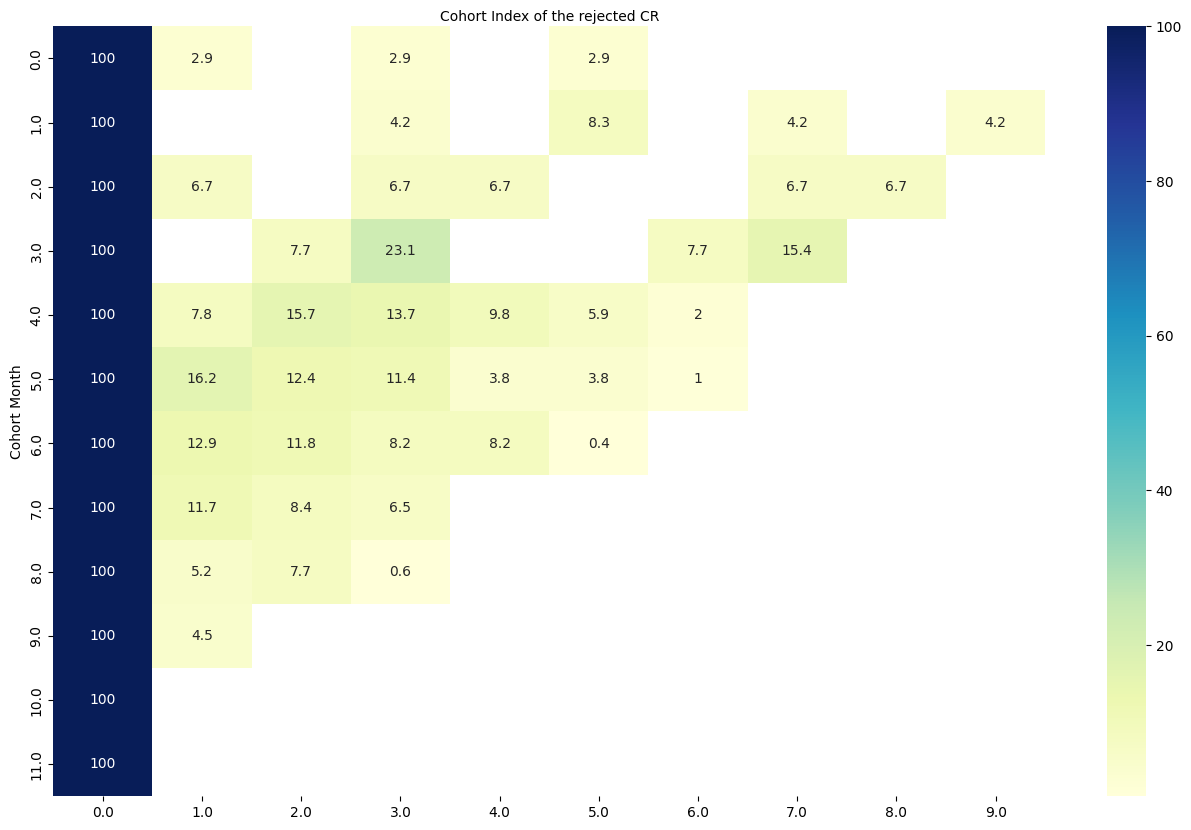

In [79]:

fig, ax = plt.subplots(1,1, figsize=(16,10))
sns.heatmap(incidents8, annot = True, cmap="YlGnBu", fmt = 'g')
ax.set_ylabel('Cohort Month')
ax.set_xlabel('Cohort Index of open incedents')
ax.xaxis.set_label_position('top')
plt.show()

BY WEEK

In [64]:
start_week = cash2['signup_week'].min()

NameError: name 'cash2' is not defined

In [ ]:
cash2['index_week_cash_request'] = cash2['signup_week'].apply(lambda x: (x - start_week).n)

In [ ]:
cash3_2 = cash2.groupby('user_id')['index_week_cash_request'].min().reset_index()
cash3_2= cash3_2.rename(columns={'index_week_cash_request':'cohort_week'})

In [ ]:

cash4_2= cash2.join(cash3_2.set_index('user_id'), on = 'user_id')
cash4_2

,user_id,created_at,YM,index_month_cash_request,signup_week,index_week_cash_request,cohort_week
0,804.0,2019-12-10 19:05:21.596873+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
1,231.0,2019-12-10 19:50:12.347780+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
2,191.0,2019-12-10 19:13:35.825460+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
3,761.0,2019-12-10 19:16:10.880172+00:00,2019-12,1,2019-12-09/2019-12-15,3,3.0
4,7686.0,2020-05-06 09:59:38.877376+00:00,2020-05,6,2020-05-04/2020-05-10,24,24.0
...,...,...,...,...,...,...,...
23965,13681.0,2020-10-12 13:54:11.686225+00:00,2020-10,11,2020-10-12/2020-10-18,47,29.0
23966,NaN,2020-10-27 14:41:25.734910+00:00,2020-10,11,2020-10-26/2020-11-01,49,NaN
23967,82122.0,2020-10-20 07:58:04.006937+00:00,2020-10,11,2020-10-19/2020-10-25,48,48.0
23968,64517.0,2020-10-10 05:40:55.700422+00:00,2020-10,11,2020-10-05/2020-10-11,46,46.0


In [ ]:
cash4_2['cohort_index_w'] = cash4_2.index_week_cash_request - cash4_2.cohort_week

In [ ]:
cash5_2 = cash4_2[['user_id', 'cohort_week', 'cohort_index_w']]
cash6_2= cash5_2.drop_duplicates(subset=['user_id', 'cohort_week', 'cohort_index_w'], keep='first')
cash7_2 = cash6_2.groupby(['cohort_week', 'cohort_index_w'])['user_id'].count().reset_index()
cash7_2 = cash7_2.rename(columns={'user_id':"costumer_count"})
cash7_2




,cohort_week,cohort_index_w,costumer_count
0,0.0,0.0,1
1,0.0,3.0,1
2,0.0,21.0,1
3,0.0,25.0,1
4,0.0,37.0,1
...,...,...,...
988,47.0,1.0,8
989,47.0,2.0,37
990,48.0,0.0,1725
991,48.0,1.0,46


In [ ]:
cash8_2 = cash7_2.pivot_table(index='cohort_week', columns='cohort_index_w', values='costumer_count')
cash8_2

cohort_index_w,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,39.0,40.0,41.0,42.0,43.0,44.0,45.0,46.0,47.0,49.0
cohort_week,,,,,,,,,,,,,,,,,,,,,
0.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0
3.0,86.0,6.0,7.0,6.0,9.0,13.0,3.0,6.0,5.0,5.0,...,8.0,3.0,4.0,1.0,5.0,10.0,3.0,4.0,NaN,NaN
4.0,85.0,5.0,11.0,9.0,5.0,5.0,4.0,6.0,1.0,6.0,...,3.0,NaN,2.0,10.0,7.0,3.0,4.0,NaN,NaN,NaN
5.0,27.0,NaN,2.0,3.0,2.0,3.0,4.0,1.0,3.0,NaN,...,1.0,1.0,6.0,5.0,2.0,2.0,NaN,NaN,NaN,NaN
6.0,10.0,1.0,1.0,2.0,1.0,2.0,1.0,NaN,NaN,NaN,...,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,24.0,1.0,2.0,4.0,2.0,NaN,2.0,1.0,1.0,3.0,...,1.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
8.0,9.0,NaN,1.0,2.0,NaN,1.0,NaN,2.0,NaN,1.0,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,10.0,2.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.0,51.0,5.0,NaN,2.0,3.0,2.0,5.0,1.0,2.0,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


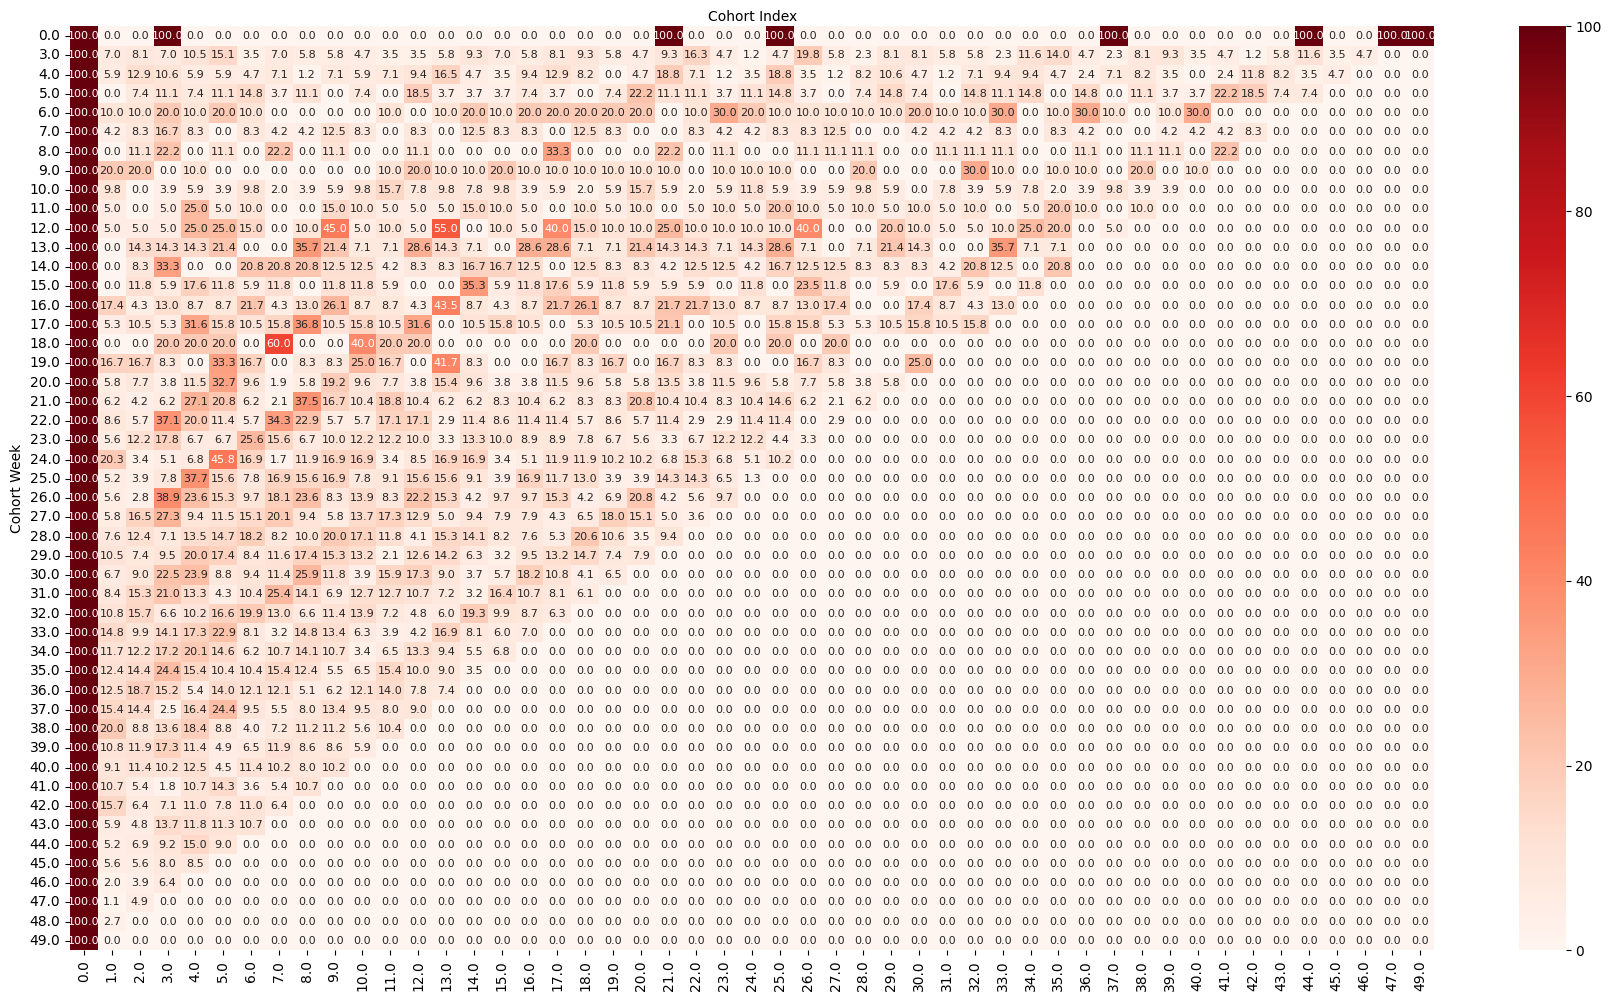

In [ ]:

cash9_2 = cash8_2.divide(cash8_2.iloc[:,0], axis=0).round(3)*100
cash9_2
fig, ax = plt.subplots(1, 1, figsize=(22, 12))  # Aumentar el tamaño de la figura
sns.heatmap(cash9_2.fillna(0),  # Reemplazar NaN por 0
            annot=True,
            cmap="Reds",
            fmt='.1f',  # Formato con una cifra decimal
            annot_kws={"size": 8})  # Ajustar el tamaño del texto de las anotaciones
ax.set_ylabel('Cohort Week')
ax.set_xlabel('Cohort Index')
ax.xaxis.set_label_position('top')
plt.show()